# Data Science JobScape 

In [1]:
import pandas as pd
import numpy as np
import sklearn
import re
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from splinter import Browser
import scrapy

### Task 1: Navigate to Data Science Job Listing in Rhode Island via O*NET Online

In [2]:
# Read table of interest with Pandas
ri_df = pd.read_html('https://www.onetonline.org/link/localjobs/15-2051.00?st=RI')

In [3]:
df1 = ri_df[0]
df1.head(5)

,Posted,Title and Company,Location
0,"June 7, 2023",Data ScientistKforce,"Johnston, RI"
1,"June 4, 2023",Lead NLP Data ScientistHumana,"Newport, RI"
2,"June 1, 2023",Lead NLP Data ScientistHumana,"Newport, RI"
3,"May 25, 2023",Sr Data ScientistCVS Health,"Woonsocket, RI"
4,"May 24, 2023",Sr Data ScientistCVS Health,"Woonsocket, RI"


In [4]:
ct_df = pd.read_html('https://www.onetonline.org/link/localjobs/15-2051.00?st=CT')

In [5]:
df2 = ct_df[0]
df2.head(5)

,Posted,Title and Company,Location
0,"June 4, 2023",Lead NLP Data ScientistHumana,"Bridgeport, CT"
1,"June 1, 2023",Lead NLP Data ScientistHumana,"Bridgeport, CT"
2,"May 21, 2023",Sr. Data ScientistCVS Health,"Hartford, CT"
3,"May 26, 2023","Data Scientist, Product AnalyticsMeta","Hartford, CT"
4,"May 19, 2023","Data Scientist, Product AnalyticsMeta","Hartford, CT"


In [6]:
ma_df = pd.read_html('https://www.onetonline.org/link/localjobs/15-2051.00?st=MA')
df3 = ma_df[0]
df3.head(5)

,Posted,Title and Company,Location
0,"June 2, 2023","Data ScientistCredence Management Solutions, LLC","Hanscom AFB, MA"
1,"June 8, 2023",Data ScientistDeloitte,"Boston, MA"
2,"April 19, 2023","Data ScientistTraceLink, Inc.","Wilmington, MA"
3,"May 25, 2023",Data ScientistCVS Health,"Wellesley, MA"
4,"May 18, 2023",Data ScientistMassMutual,"Boston, MA"


In [7]:
DF = pd.concat([df1, df2, df3], axis=0)
DF

,Posted,Title and Company,Location
0,"June 7, 2023",Data ScientistKforce,"Johnston, RI"
1,"June 4, 2023",Lead NLP Data ScientistHumana,"Newport, RI"
2,"June 1, 2023",Lead NLP Data ScientistHumana,"Newport, RI"
3,"May 25, 2023",Sr Data ScientistCVS Health,"Woonsocket, RI"
4,"May 24, 2023",Sr Data ScientistCVS Health,"Woonsocket, RI"
...,...,...,...
56,"May 18, 2023",Data EngineerMassMutual,"Springfield, MA"
57,"May 18, 2023",Data EngineerMassMutual,"Boston, MA"
58,"May 9, 2023",Associate Director of Analytics and Data Quali...,"Boston, MA"
59,"April 19, 2023",Data Analytics SpecialistCadmus,"Boston, MA"


In [8]:
# Split the field at the point where lowercase and uppercase letters meet
pattern = r'(?<=[a-z])(?=[A-Z])'
DF[['Title', 'Company']] = DF['Title and Company'].str.split(pattern, n=1, expand=True)

# Remove any leading/trailing whitespaces
DF['Title'] = DF['Title'].str.strip()
DF['Company'] = DF['Company'].str.strip()

# Drop the 'Title and Company' Field
DF.drop('Title and Company', axis=1, inplace=True)

# Reorder columns
DF = DF[['Posted', 'Title', 'Company', 'Location']]

# Inspect resulting df
DF

,Posted,Title,Company,Location
0,"June 7, 2023",Data Scientist,Kforce,"Johnston, RI"
1,"June 4, 2023",Lead NLP Data Scientist,Humana,"Newport, RI"
2,"June 1, 2023",Lead NLP Data Scientist,Humana,"Newport, RI"
3,"May 25, 2023",Sr Data Scientist,CVS Health,"Woonsocket, RI"
4,"May 24, 2023",Sr Data Scientist,CVS Health,"Woonsocket, RI"
...,...,...,...,...
56,"May 18, 2023",Data Engineer,MassMutual,"Springfield, MA"
57,"May 18, 2023",Data Engineer,MassMutual,"Boston, MA"
58,"May 9, 2023",Associate Director of Analytics and Data Quality,Takeda Pharmaceuticals,"Boston, MA"
59,"April 19, 2023",Data Analytics Specialist,Cadmus,"Boston, MA"


In [9]:
DF.Title.unique()

array(['Data Scientist', 'Lead NLP Data Scientist', 'Sr Data Scientist',
       'Senior Data Scientist', 'Lead Data Scientist',
       'Data Scientist, Product Analytics', 'AI Lead Data Scientist',
       'Director & Data Scientist', 'AI Data Scientist/Product Owner',
       'Senior Data Scientist I (Remote)RELX INC',
       'Data Scientist (Hybrid / Remote)UMB Bank',
       'Cleared Data Scientist - Data Mining/Analytics/Data Visualization',
       'Data Scientist-Business Intelligence Engineer (Remote)Wolters Kluwer',
       'Data Scientist, Product Analytics - Reality Labs',
       'Data Scientist, Product - Generative AIMeta',
       'Data Scientist, Product Analytics - Monetization',
       'Data Scientist, Underwriting Automation and Artificial Intelligence',
       'Senior Data Scientist, Predictive Analytics/Artificial Intelligence – (JRD DS)J&J Family of Companies',
       'Lead Cognitive/Machine Learning Professional - MLPHumana',
       'Senior Machine Learning Engineer',
  

In [17]:
# Filter the titles to exclude any senior positions
DF2 = DF[~DF['Title'].str.contains(r'Engineer|Lead|Manager|Principal|Senior|Sr|Lead|Director', case=False)].dropna() 
DF2

,Posted,Title,Company,Location
0,"June 7, 2023",Data Scientist,Kforce,"Johnston, RI"
9,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
10,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
11,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
12,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
15,"June 7, 2023",AI Data Scientist/Product Owner,Travelers Insurance Company,"Providence, RI"
18,"May 19, 2023",Cleared Data Scientist - Data Mining/Analytics...,Guidehouse,"Providence, RI"
20,"June 10, 2023","Data Scientist, Product Analytics - Reality Labs",Meta,"Providence, RI"
23,"June 10, 2023","Data Scientist, Product Analytics - Reality Labs",Meta,"Providence, RI"
24,"May 23, 2023","Data Scientist, Product Analytics - Monetization",Meta,"Providence, RI"


In [18]:
# Get the value counts on Titles in DF2
DF2.Title.value_counts()

Data Scientist                                                         9
Data Scientist, Product Analytics                                      8
Data Scientist, Product Analytics - Reality Labs                       4
Data Scientist, Product Analytics - Monetization                       4
AI Data Scientist/Product Owner                                        3
Cleared Data Scientist - Data Mining/Analytics/Data Visualization      3
Data Scientist, Underwriting Automation and Artificial Intelligence    3
Data Analytics Consultant                                              3
Data Analytics Specialist                                              3
R&D Digital Transformation and Data Scientist - Beauty & Wellbeing     1
Associate Data Scientist                                               1
Data / AI Scientist                                                    1
Name: Title, dtype: int64

In [19]:
# Get the value counts on Companies in DF2
DF2.Company.value_counts()

Meta                                       16
Travelers Insurance Company                 6
Guidehouse                                  6
Cadmus                                      3
MassMutual                                  3
Kforce                                      1
Unilever                                    1
Credence Management Solutions, LLC          1
Deloitte                                    1
TraceLink, Inc.                             1
CVS Health                                  1
Akoya Biosciences, Inc.                     1
Blue Cross Blue Shield of Massachusetts     1
Takeda Pharmaceuticals                      1
Name: Company, dtype: int64

In [20]:
BigThree = DF2[DF2['Company'].str.contains(r'Meta|Travelers|Guidehouse')]
BigThree

,Posted,Title,Company,Location
9,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
10,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
11,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
12,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
15,"June 7, 2023",AI Data Scientist/Product Owner,Travelers Insurance Company,"Providence, RI"
18,"May 19, 2023",Cleared Data Scientist - Data Mining/Analytics...,Guidehouse,"Providence, RI"
20,"June 10, 2023","Data Scientist, Product Analytics - Reality Labs",Meta,"Providence, RI"
23,"June 10, 2023","Data Scientist, Product Analytics - Reality Labs",Meta,"Providence, RI"
24,"May 23, 2023","Data Scientist, Product Analytics - Monetization",Meta,"Providence, RI"
25,"May 23, 2023","Data Scientist, Product Analytics - Monetization",Meta,"Providence, RI"


# The code below is work from session 1 --> the R&D that went into the code above.

### Parse through Title and Company and Separate them into separate fields

In [4]:
# Inspect a sample of the field to be parsed
df1['Title and Company'][0]

'Data ScientistFord Motor Company'

In [5]:
# Split the field at the point where lowercase and uppercase letters meet
pattern = r'(?<=[a-z])(?=[A-Z])'
df1[['Title', 'Company']] = df1['Title and Company'].str.split(pattern, n=1, expand=True)

# Remove any leading/trailing whitespaces
df1['Title'] = df1['Title'].str.strip()
df1['Company'] = df1['Company'].str.strip()

# Drop the 'Title and Company' Field
df1.drop('Title and Company', axis=1, inplace=True)

# Reorder columns
df1 = df1[['Posted', 'Title', 'Company', 'Location']]

# Inspect resulting df
df1

,Posted,Title,Company,Location
0,"May 13, 2023",Data Scientist,Ford Motor Company,"Providence, RI"
1,"May 17, 2023",Data Scientist,Guidehouse,"Providence, RI"
2,"May 25, 2023",Senior Data Scientist,Humana,"Newport, RI"
3,"May 28, 2023",Lead Data Scientist,CVS Health,"Woonsocket, RI"
4,"May 28, 2023",Senior Data Scientist,CVS Health,"Woonsocket, RI"
5,"May 25, 2023",Sr Data Scientist,CVS Health,"Woonsocket, RI"
6,"May 24, 2023",Sr Data Scientist,CVS Health,"Woonsocket, RI"
7,"May 28, 2023",Sr Data Scientist,CVS Health,"Woonsocket, RI"
8,"May 24, 2023",Senior Data Scientist,CVS Health,"Woonsocket, RI"
9,"May 24, 2023",Sr Data Scientist,CVS Health,"Woonsocket, RI"


### Filter out all 'Senior', 'Sr', and 'Lead'

In [20]:
# Filter out entries containing 'Senior', 'Sr', or 'Lead' in the 'Title' field
filtered_df1 = df1[~df1['Title'].str.contains(r'Senior|Sr|Lead', case=False)]
filtered_df1

,Posted,Title,Company,Location
0,"May 13, 2023",Data Scientist,Ford Motor Company,"Providence, RI"
1,"May 17, 2023",Data Scientist,Guidehouse,"Providence, RI"
10,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
11,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
12,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
13,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
14,"April 6, 2023",Cleared Data Scientist,Guidehouse,"Providence, RI"
16,"May 19, 2023",Cleared Data Scientist - Data Mining/Analytics...,Guidehouse,"Providence, RI"
17,"May 19, 2023",Data Scientist-Business Intelligence Engineer ...,None,"Providence, RI"
18,"May 23, 2023","Data Scientist, Product Analytics - Monetization",Meta,"Providence, RI"


### Question: What companies are hiring Non-Senior/Lead Data Scientists in Rhode Island?

In [22]:
ri_companies = filtered_df1.groupby('Company', as_index=False)['Title'].count()
ri_companies = ri_companies.sort_values('Title', ascending=False)
print(f"Total job openings: {len(ri_companies)}")
ri_companies

Total job openings: 7


,Company,Title
5,Meta,10
3,Guidehouse,4
6,Travelers Insurance Company,4
0,CVS Health,1
1,Cadmus,1
2,Ford Motor Company,1
4,Humana,1


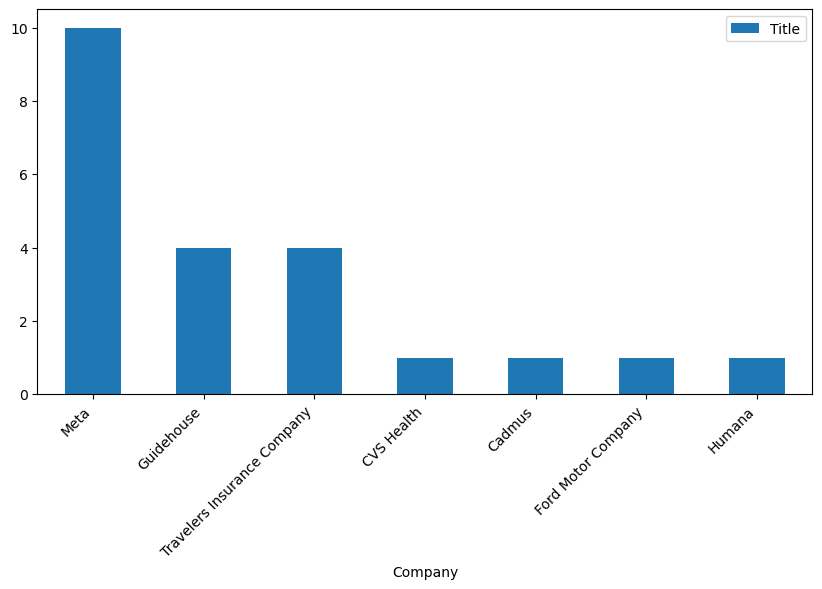

In [45]:
# Plot the bar chart with rotated x-axis labels
ax = ri_companies.plot.bar(x='Company', y='Title', figsize=[10,5])
ax.set_xticklabels(ri_companies['Company'], rotation=45, ha='right')
plt.show()

### Question II: What companies are hiring Data Scientists in Massachusetts?

In [24]:
ma_df = pd.read_html('https://www.onetonline.org/link/localjobs/15-2051.00?st=MA')
df2 = ma_df[0]

# Split the field at the point where lowercase and uppercase letters meet
pattern = r'(?<=[a-z])(?=[A-Z])'
df2[['Title', 'Company']] = df2['Title and Company'].str.split(pattern, n=1, expand=True)

# Remove any leading/trailing whitespaces
df2['Title'] = df2['Title'].str.strip()
df2['Company'] = df2['Company'].str.strip()

# Drop the 'Title and Company' Field
df2.drop('Title and Company', axis=1, inplace=True)

# Reorder columns
df2 = df2[['Posted', 'Title', 'Company', 'Location']]

# Filter out entries containing 'Senior', 'Sr', or 'Lead' in the 'Title' field
filtered_df2 = df2[~df2['Title'].str.contains(r'Senior|Sr|Lead', case=False)]
filtered_df2

# Inspect resulting df
filtered_df2

,Posted,Title,Company,Location
0,"April 19, 2023",Data Scientist,"TraceLink, Inc.","Wilmington, MA"
1,"May 25, 2023",Data Scientist,CVS Health,"Wellesley, MA"
2,"May 6, 2023",Data Scientist,CVS Health,"Wellesley, MA"
3,"May 18, 2023",Data Scientist,MassMutual,"Boston, MA"
4,"May 18, 2023",Data Scientist,MassMutual,"Springfield, MA"
5,"May 18, 2023",Data Scientist,MassMutual,"Amherst, MA"
6,"May 13, 2023",Data Scientist,Ford Motor Company,"Boston, MA"
7,"May 11, 2023",Data Scientist,"Akoya Biosciences, Inc.","Marlborough, MA"
8,"May 17, 2023",Data Scientist,Guidehouse,"Boston, MA"
13,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Boston, MA"


In [51]:
ma_companies = filtered_df2.groupby('Company', as_index=False)['Title'].count()
ma_companies = ma_companies.sort_values('Title', ascending=False)
print(f"Total job openings: {len(ma_companies)}")
ma_companies

Total job openings: 18


,Company,Title
12,MassMutual,5
13,Meta,5
9,Guidehouse,4
17,Travelers Insurance Company,4
4,CVS Health,3
15,Takeda Pharmaceuticals,2
5,Cadmus,1
6,Chewy,1
7,Flipside Crypto,1
8,Ford Motor Company,1


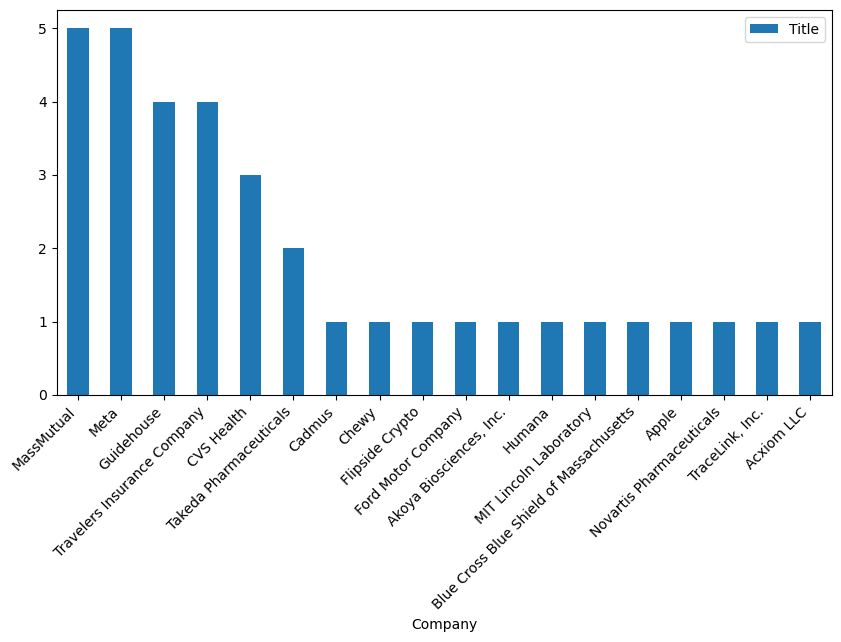

In [52]:
# Plot the bar chart with rotated x-axis labels
ax = ma_companies.plot.bar(x='Company', y='Title', figsize=[10,5])
ax.set_xticklabels(ma_companies['Company'], rotation=45, ha='right')
plt.show()

### Question III: What companies are hiring Data Scientists in Connecticut?

In [28]:
ct_df = pd.read_html('https://www.onetonline.org/link/localjobs/15-2051.00?st=CT')
df3 = ct_df[0]

# Split the field at the point where lowercase and uppercase letters meet
pattern = r'(?<=[a-z])(?=[A-Z])'
df3[['Title', 'Company']] = df3['Title and Company'].str.split(pattern, n=1, expand=True)

# Remove any leading/trailing whitespaces
df3['Title'] = df3['Title'].str.strip()
df3['Company'] = df3['Company'].str.strip()

# Drop the 'Title and Company' Field
df3.drop('Title and Company', axis=1, inplace=True)

# Reorder columns
df3 = df3[['Posted', 'Title', 'Company', 'Location']]

# Filter out entries containing 'Senior', 'Sr', or 'Lead' in the 'Title' field
filtered_df3 = df3[~df3['Title'].str.contains(r'Senior|Sr|Lead', case=False)]

# Inspect resulting df
filtered_df3

,Posted,Title,Company,Location
0,"May 13, 2023",Data Scientist,Ford Motor Company,"Hartford, CT"
1,"May 17, 2023",Data Scientist,Guidehouse,"Hartford, CT"
4,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Hartford, CT"
5,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Hartford, CT"
8,"April 6, 2023",Cleared Data Scientist,Guidehouse,"Hartford, CT"
11,"May 19, 2023",Cleared Data Scientist - Data Mining/Analytics...,Guidehouse,"Hartford, CT"
12,"May 19, 2023",Data Scientist-Business Intelligence Engineer ...,None,"Hartford, CT"
15,"May 23, 2023","Data Scientist, Product Analytics - Monetization",Meta,"Hartford, CT"
16,"May 23, 2023","Data Scientist, Product Analytics - Monetization",Meta,"Hartford, CT"
17,"May 20, 2023","Data Scientist, Product Analytics - App Founda...",Meta,"Hartford, CT"


In [29]:
ct_companies = filtered_df3.groupby('Company', as_index=False)['Title'].count()
ct_companies = ct_companies.sort_values('Title', ascending=False)
print(f"Total job openings: {len(ct_companies)}")
ct_companies

Total job openings: 9


,Company,Title
6,Meta,5
4,Guidehouse,4
7,Travelers Insurance Company,4
0,Acxiom LLC,1
1,CVS Health,1
2,Cadmus,1
3,Ford Motor Company,1
5,Humana,1
8,Unilever,1


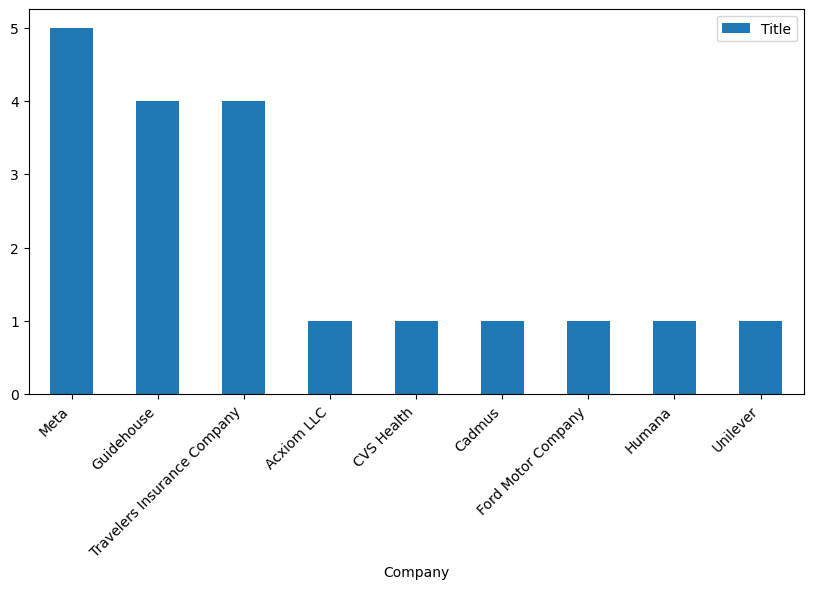

In [46]:
# Plot the bar chart with rotated x-axis labels
ax = ct_companies.plot.bar(x='Company', y='Title', figsize=[10,5])
ax.set_xticklabels(ct_companies['Company'], rotation=45, ha='right')
plt.show()

## Concatinate the 3 dataframes

In [31]:
DF = pd.concat([filtered_df1, filtered_df2, filtered_df3], axis=0)
DF

,Posted,Title,Company,Location
0,"May 13, 2023",Data Scientist,Ford Motor Company,"Providence, RI"
1,"May 17, 2023",Data Scientist,Guidehouse,"Providence, RI"
10,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
11,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
12,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
...,...,...,...,...
27,"May 24, 2023","Director, Data Science - Fraud Detection",Travelers Insurance Company,"Hartford, CT"
28,"May 20, 2023",Data Engineer I - Data Modeler,Travelers Insurance Company,"Hartford, CT"
29,"May 17, 2023",Data Engineer ITravelers Insurance Company,None,"Hartford, CT"
30,"April 19, 2023",Data Analytics Specialist,Cadmus,"Hartford, CT"


## Groupby location to find hotspots

In [67]:
DF_Locations = DF.groupby('Location', as_index=False)['Title'].count().sort_values('Title', ascending=False)
DF_Locations.head(3)

,Location,Title
1,"Boston, MA",24
10,"Providence, RI",21
6,"Hartford, CT",18


### Question: What are the unique job titles in the filtered, concatenated df?

In [65]:
unique_titles = DF.groupby('Title', as_index=False)['Posted'].count().sort_values('Posted', ascending=False)
unique_titles.head(10)

,Title,Posted
15,Data Scientist,13
19,"Data Scientist, Product Analytics - Monetization",8
17,"Data Scientist, Product Analytics",8
11,Data Engineer,5
18,"Data Scientist, Product Analytics - App Founda...",4
10,Data Analytics Specialist,3
21,Data Scientist-Business Intelligence Engineer ...,3
22,"Director, Data Science - Fraud Detection",3
13,"Data Engineer I, Underwriting Automation and A...",3
12,Data Engineer I - Data Modeler,3


## Findings from Session 1:
### 1. The Data Science Job Hubs in and around RI are Boston, Providence, and Hartford.
### 2. The three most common titles in RI, MA, and CT are 'Data Scientist', 'Data Scientist, Product Analytics - Monetization', and 'Data Scientist, Product Analytics'

# Session 2: 

### Question: What companies are hiring in the 3 Job Hub Cities?

In [76]:
job_hub_cities = ['Boston, MA', 'Providence, RI', 'Hartford, CT']

Job_Hub_Listings = DF[DF['Location'].isin(job_hub_cities)]
Job_Hub_Listings

,Posted,Title,Company,Location
0,"May 13, 2023",Data Scientist,Ford Motor Company,"Providence, RI"
1,"May 17, 2023",Data Scientist,Guidehouse,"Providence, RI"
10,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
11,"May 26, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
12,"May 19, 2023","Data Scientist, Product Analytics",Meta,"Providence, RI"
...,...,...,...,...
27,"May 24, 2023","Director, Data Science - Fraud Detection",Travelers Insurance Company,"Hartford, CT"
28,"May 20, 2023",Data Engineer I - Data Modeler,Travelers Insurance Company,"Hartford, CT"
29,"May 17, 2023",Data Engineer ITravelers Insurance Company,None,"Hartford, CT"
30,"April 19, 2023",Data Analytics Specialist,Cadmus,"Hartford, CT"


In [82]:
listing_by_city_company = Job_Hub_Listings.groupby(['Location', 'Company']).size().reset_index(name='Count')
listing_by_city_company = listing_by_city.sort_values('Count', ascending=False)
listing_by_city_company

,Location,Company,Count
20,"Providence, RI",Meta,10
8,"Boston, MA",Meta,5
15,"Hartford, CT",Meta,5
21,"Providence, RI",Travelers Insurance Company,4
14,"Hartford, CT",Guidehouse,4
19,"Providence, RI",Guidehouse,4
5,"Boston, MA",Guidehouse,4
10,"Boston, MA",Travelers Insurance Company,4
16,"Hartford, CT",Travelers Insurance Company,4
7,"Boston, MA",MassMutual,2


In [83]:
listing_by_company = Job_Hub_Listings.groupby('Company').size().reset_index(name='Count')
listing_by_company = listing_by_company.sort_values('Count', ascending=False)
listing_by_company

,Company,Count
8,Meta,20
5,Guidehouse,12
10,Travelers Insurance Company,12
2,Cadmus,3
4,Ford Motor Company,3
0,Acxiom LLC,2
7,MassMutual,2
9,Takeda Pharmaceuticals,2
1,Blue Cross Blue Shield of Massachusetts,1
3,Chewy,1


## Meta, Guidehouse, and Travelers Insurance Company are the Big Three in RI, MA, & CT